# Сегментация клиентской базы телекоммуникационной компании

**Аналитическая задача** — провести анализ данных с целью выделения наиболее типичных групп клиентов и разработки предложений для каждой из групп.

# Описание данных
Каждый клиент описывается следующим набором признаков:
- `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`, `Дата подключения тарифа`.

# Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- восстановить пропущенные значения;
- проверить наличие аномальных значений;


**Шаг 3.** Добавление новых переменных:
- по значениям признака `Возраст` введите новую переменную `Возрастная категория`, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу:

$$
\text{Возрастная категория} = 
\left\{
\begin{array}{l}
\text{студент,} \quad \text{если Возраст } \in [19, 24];\\  
\text{аспирант,} \quad \text{если Возраст } \in [25, 33];\\
\text{бизнесмен,} \quad \text{если Возраст } \in [34, 56];\\
\text{знаток,} \quad \text{если Возраст } \in [57, 70].
\end{array}
\right.
$$ 

- по значениям признака `Дата подключения тарифа` создайте признаки: `Год подключения`, `Месяц подключения`, `Дата подключения`;  

**Шаг 3.** Провести исследовательский анализ данных:
- в разрезе значений признаков `Год подключения`, `Месяц подключения`, `Дата подключения` исследуйте:
    - динамику подключения к тарифам (количество клиентов). Постройте графики. В какой год, месяц и день подключались меньше/больше всего клиентов? Какие выводы можно сделать?
- в разрезе значений признака `Возрастная категория` исследуйте распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);
- клиенты каких возрастных категорий (ТОП-2):
  
    - больше всего в среднем в месяц тратят на оплату услуг связи;
    - больше всего тратят времени на общение в месяц днем, вечером и ночью;
    - больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;

- с помощью диаграмм рассеивания исследуейте зависимости между признаками `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Какие выводы можно сделать?

## 1. Загрузка данных

### 1.1 Подключение необходимых библиотек

In [65]:
# импорт пакетов
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans

from scipy import stats as st
import math 

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
pd.options.display.precision = 2
pd.options.display.float_format ='{:.2f}'.format

### 1.2 Загрузка данных в датафрейм  

In [66]:
df = pd.read_csv('/workspaces/codespaces-jupyter/data/dataset_telecom.csv')
df.head(2)

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
0,24,NaN,2.40,12.00,65.00,5,0,0,5,56,2018-06-17 12:14:35
1,51,287.51,1.70,111.00,109.00,1,44,0,6,1,2021-10-21 15:39:54


### Вывод 

На данном шаге 
- подключены библиотеки, необходимые для начала работы;
- загружены исходные данные.

Данные загружены корректно, однако требуют определенной обработки, которая и будет далее проведена.   

## 2 Предобработка данных

Замысел шага: на данном этапе необходимо не только подготовить данные для дальнейшего анализа, но и получить целостное представление об имеющейся выборке.  

Начнем с корректировки заголовков.

$\blacktriangleright$ Вводим английские заголовки во избежание проблем с кодированием.

In [67]:
df.rename(columns={'Возраст':'age',
                  'Среднемесячный расход':'avr_outcome',
                  'Средняя продолжительность разговоров': 'avr_calls_duration',
                  'Звонков днем за месяц': 'day_calls_per_month',
                  'Звонков вечером за месяц': 'evening_calls_per_month', 
                  'Звонков ночью за месяц': 'night_calls_per_month',
                  'Звонки в другие города': 'calls_to_other_cities',
                  'Звонки в другие страны': 'calls_to_other_countries',
                  'Доля звонков на стационарные телефоны': 'perc_of_calls_to_landlines',
                  'Количество SMS за месяц': 'number_of_sms',
                  'Дата подключения тарифа': 'tariff_activ_date'},
                    inplace = True);

In [68]:
df.head(2)

,age,avr_outcome,avr_calls_duration,day_calls_per_month,evening_calls_per_month,night_calls_per_month,calls_to_other_cities,calls_to_other_countries,perc_of_calls_to_landlines,number_of_sms,tariff_activ_date
0,24,NaN,2.40,12.00,65.00,5,0,0,5,56,2018-06-17 12:14:35
1,51,287.51,1.70,111.00,109.00,1,44,0,6,1,2021-10-21 15:39:54


$\blacktriangleright$ Переводим заголовки признаков с словарь для:

- вывода какой-либо информации о признаках в циклах;
- подписей на графиках.

In [69]:
dict_to_rus = {
'age':'возраст пользователя',
'avr_outcome':'расход в месяц',
'avr_calls_duration': 'средняя продолжительность разговоров',
'day_calls_per_month': 'звонки днем за месяц',
'evening_calls_per_month': 'звонки вечером за месяц',
'night_calls_per_month': 'звонки ночью за месяц',
'calls_to_other_cities': 'в другие города',
'calls_to_other_countries': 'в другие страны',
'perc_of_calls_to_landlines': 'доля звонков на стац. телефоны',
'number_of_sms': 'количество sms за месяц',
'tariff_activ_date': 'дата подключения тарифа'
} 

### 2.2 Анализ типов данных

С помощью методом `.info()` исследуем соответствие установленных типов признаков их смысловому содержанию. Здесь будем использовать именно метод `.info()`, а не свойство `dtypes`, поскольку можем сразу получить информацию по пропускам. При необходимости выполним преобразование.  

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         4492 non-null   int64  
 1   avr_outcome                 4468 non-null   float64
 2   avr_calls_duration          4475 non-null   float64
 3   day_calls_per_month         4472 non-null   float64
 4   evening_calls_per_month     4489 non-null   float64
 5   night_calls_per_month       4492 non-null   object 
 6   calls_to_other_cities       4492 non-null   object 
 7   calls_to_other_countries    4492 non-null   int64  
 8   perc_of_calls_to_landlines  4492 non-null   object 
 9   number_of_sms               4492 non-null   object 
 10  tariff_activ_date           4492 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 386.2+ KB


**Промежуточный вывод:** Заголовки признаков приведены к единообразию, но присутствуют 5 признаков типа Object, необходимость преобразования каждого рассмотрим ниже.

### 2.3 Преобразование типов данных
С помощью методоd .unique() исследуем колонки типа object. При необходимости выполним преобразование.

In [71]:
for col in df.select_dtypes(['object']).columns:
  print(f'---{col}---')
  print(df[col].unique())

---night_calls_per_month---
['5' '1' '0' '4' '3' '10' '2' '8' '6' '15' '7' '25' '9' '37' '30' '42'
 '48' '27' '23' '59' '33' '49' '21' '38' '19' '26' "'7'" '12' '34' '29'
 '35' '44' '20' '64' '84' '32' '17' '62' '98' '31' '28' '52' '55' '40'
 '100' '97' '22' '72' '101' '89' '13' '71' '36' '50' '85' '39' '45' '66'
 '53' '24' '18' '106' '16' '41' '88' '51' '14' '43' '46' '11' '67' '75'
 '63' '92' '70' '56' '47' '109' '83' '93' '103' '95' '77' '102' '65' '54'
 '105' '76' '57' '61' '87' '58' '78' '110' '73' '90' '82' '80' '69' '60'
 '86' '79' '68' '91' '108']
---calls_to_other_cities---
['0' '44' '1' '2' '30' '4' '25' '58' '7' '36' '38' '41' '24' '33' '31' '6'
 '76' '11' '3' '5' '10' '42' '22' '40' '13' '49' '15' '32' '20' '34' '12'
 '14' '9' '8' '16' '28' '18' '43' '27' "'29'" '37' '19' '29' '26' '23'
 '46' '39' '45' '17' "'0'" '48' '57' '21' '81' '35' '47' '67' '61' '69'
 '73' '68' '54' '50' '74' '60' '78' '65' '51' '86' '88']
---perc_of_calls_to_landlines---
['5' '6' '1' '11' '16' '8' '

In [72]:
def func(val):
  val = val.replace("'",'')
  return int(val) 

df['night_calls_per_month'] = df['night_calls_per_month'].apply(func)
df['calls_to_other_cities'] = df['calls_to_other_cities'].apply(func)
df['perc_of_calls_to_landlines'] = df['perc_of_calls_to_landlines'].apply(func)
df['number_of_sms'] = df['number_of_sms'].apply(func)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         4492 non-null   int64  
 1   avr_outcome                 4468 non-null   float64
 2   avr_calls_duration          4475 non-null   float64
 3   day_calls_per_month         4472 non-null   float64
 4   evening_calls_per_month     4489 non-null   float64
 5   night_calls_per_month       4492 non-null   int64  
 6   calls_to_other_cities       4492 non-null   int64  
 7   calls_to_other_countries    4492 non-null   int64  
 8   perc_of_calls_to_landlines  4492 non-null   int64  
 9   number_of_sms               4492 non-null   int64  
 10  tariff_activ_date           4492 non-null   object 
dtypes: float64(4), int64(6), object(1)
memory usage: 386.2+ KB


**Промежуточный вывод:** После замены некоторых выбившихся чисел-строк на числа, установленные типы признаков соответствуют их смысловой нагрузке. Однако, заметим, что в выборке имеются пропуски.  

### 2.4 Поиск дубликатов

In [74]:
print('Количество дублирующихся записей -- {}. Это составляет -- {:.2%} от общего числа записей.'.
      format(df.duplicated().sum(), df.duplicated().sum()/df.shape[0]))

Количество дублирующихся записей -- 0. Это составляет -- 0.00% от общего числа записей.


**Промежуточный вывод:** Говорим уверенно -- дублирующихся записей нет.


### 2.5 Восстановление пропущенных значений

На данном этапе
- оценим количество пропущенных значений;
- примем решение о судьбе пропусков.


In [75]:
for col in df.columns:
    sum_missing = df[df[col].isnull()].shape[0]
    if sum_missing == 0: continue
    else: print('{} - {} пустые значения'.format(col, sum_missing)) 

avr_outcome - 24 пустые значения
avr_calls_duration - 17 пустые значения
day_calls_per_month - 20 пустые значения
evening_calls_per_month - 3 пустые значения


In [76]:
df = df.fillna(df.mode())

**Вывод:** Найдены 64 пропущенных значения в 4 показателях. Значения восстановлены как модальные. 

### 2.6 Анализ аномальных значений 

Попробуем провести дополнительное исследование выделенных признаков на аномальные значения, возможно попутно удастся получить дополнительные полезные сведения. Воспользуемся визуализацией.
Также разделим выбранную совокупность признаков на категориальные и интервальные, и будем обрабатывать их отдельно.

## 3 Описательные статистики 

### 3.1 Добавление новых категориальных признаков:

*   по значениям признака Возраст введем новую переменную Возрастная категория (age_category), принимающую значения "студент", "аспирант", "бизнесмен" и "знаток".
*  по значениям признака Дата подключения тарифа создайте признаки: Год подключения, Месяц подключения, Дата подключения;



Добавим категориальный признак для возраста, критерии которого были предоставлены заранее (age_category) и добавим год, месяц, день для целей задачи 

In [77]:
df['year'] = pd.DatetimeIndex(df['tariff_activ_date']).year
df['month'] = pd.DatetimeIndex(df['tariff_activ_date']).month
df['day'] = pd.DatetimeIndex(df['tariff_activ_date']).day

In [78]:
def func1(df):
  if (df['age'] >= 19) & (df['age'] <= 24) : return 'студент'
  if (df['age'] >  24) & (df['age'] <= 33) : return 'аспирант'
  if (df['age'] >  33) & (df['age'] <= 56) : return 'бизнесмен'
  if (df['age'] >  56) & (df['age'] <= 70) : return 'знаток'

df['age_category'] = df.apply(func1, axis=1)
age_category = df.apply(func1, axis=1)


$\blacktriangleright$ Анализ категориальных признаков
<a class="anchor" id="category_var"></a>

В разрезе категории возраста (age_category) взглянем на адекватность данной выборки.

In [79]:
df.groupby('age_category').describe()

age                                          avr_outcome  \
               count  mean  std   min   25%   50%   75%   max       count   
age_category                                                                
аспирант      831.00 29.31 2.54 25.00 27.00 30.00 31.00 33.00      824.00   
бизнесмен    2483.00 45.33 6.48 34.00 40.00 45.00 51.00 56.00     2471.00   
знаток        661.00 61.42 4.16 57.00 58.00 60.00 65.00 70.00      659.00   
студент       517.00 20.67 1.58 19.00 19.00 20.00 21.00 24.00      515.00   

                                                               \
               mean    std   min    25%    50%    75%     max   
age_category                                                    
аспирант     702.40 697.54 12.28 266.91 464.76 902.38 4670.61   
бизнесмен    514.02 636.69  3.60 183.02 339.20 601.62 5142.76   
знаток       441.34 698.99  5.40  46.92 222.95 502.26 4555.32   
студент      231.03 367.94  3.18  54.70 136.76 262.95 4579.68   

             avr_calls_duration                                      \
                          count mean  std  min  25%  50%  75%   max   
age_category                                                          
аспирант                 829.00 5.38 3.48 1.00 2.60 4.40 7.70 20.00   
бизнесмен               2472.00 4.27 2.90 0.90 2.10 3.40 5.90 20.00   
знаток                   657.00 3.72 2.61 1.00 1.90 2.80 5.00 15.00   
студент                  517.00 2.85 2.39 0.10 0.90 2.40 4.00 17.00   

             day_calls_per_month                                            \
                           count  mean   std  min   25%   50%   75%    max   
age_category                                                                 
аспирант                  827.00 80.39 62.56 5.00 50.00 63.00 95.00 489.00   
бизнесмен                2473.00 65.62 62.12 1.00 40.00 55.00 69.00 500.00   
знаток                    658.00 56.64 73.82 1.00 13.00 44.00 65.00 496.00   
студент                   514.00 38.37 37.55 1.00 23.00 35.00 47.75 399.00   

             evening_calls_per_month                                      \
                               count  mean   std  min   25%   50%    75%   
age_category                                                               
аспирант                      831.00 85.51 36.57 2.00 59.00 85.00 114.50   
бизнесмен                    2481.00 69.90 40.96 2.00 41.00 70.00  96.00   
знаток                        660.00 54.22 46.35 1.00  8.00 51.00  90.00   
студент                       517.00 68.85 33.37 2.00 52.00 70.00  95.00   

                    night_calls_per_month                                   \
                max                 count  mean   std  min  25%  50%   75%   
age_category                                                                 
аспирант     160.00                831.00 14.44 24.52 0.00 0.00 3.00 21.50   
бизнесмен    160.00               2483.00  3.89 10.88 0.00 0.00 0.00  3.00   
знаток       159.00                661.00  2.08  5.49 0.00 0.00 0.00  2.00   
студент      158.00                517.00  9.95 11.78 0.00 3.00 7.00 10.00   

                    calls_to_other_cities                                   \
                max                 count  mean   std  min  25%  50%   75%   
age_category                                                                 
аспирант     110.00                831.00 11.20 14.07 0.00 0.00 5.00 19.00   
бизнесмен    106.00               2483.00  9.88 14.16 0.00 0.00 3.00 18.00   
знаток        53.00                661.00  6.84 12.58 0.00 0.00 0.00  6.00   
студент      101.00                517.00  1.07  4.05 0.00 0.00 0.00  0.00   

                   calls_to_other_countries                                \
               max                    count mean  std  min  25%  50%  75%   
age_category                                                                
аспирант     86.00                   831.00 0.51 1.34 0.00 0.00 0.00 0.00   
бизнесмен    88.00                  2483.

**Промежуточный выход:** Анализ значений описательных статистик по категориальному признак "age_category" позволяет сделать следующие выводы:
1. Признак `age` --- аномальных значений не наблюдается, но большая часть выборки - бизнесмены не старше 45 лет.
2. Признак `avr_outcome` --- аномальных значений не наблюдается, хотя минимальные значения большинства аспирантов явно выбиваются. Надо исследовать.
3. Признак `avr_calls_duration` --- аномальных значений не наблюдается. Однако отметим, что средняя продолжительность звонков 3 - 5 минут в зависимости от категорий, максимальная  не более 20.
4. Признак `day_calls_per_month` --- аномальных значений не наблюдается. Большая часть данных приближена к 60. У студентов к 40.
5. Признак `evening_calls_per_month` --- аномальных значений не наблюдается. Большая часть данных приближена к 90.
6. Признак `night_calls_per_month` --- аномальных значений не наблюдается. Услугой пользуются по большей части студенты и аспиранты.
7. Признак `calls_to_other_cities` --- аномальных значений не наблюдается. Данные то есть то нет. 
8. Признак `calls_to_other_countries` --- аномальных значений не наблюдается, Данные то есть то нет.
9. Признак `perc_of_calls_to_landlines` -- аномальных значений не наблюдается. Видим, что значительная часть клиентов все же пользуются услугой раз в три дня, (за исключением студентов).
10. Признак `number_of_sms` -- аномальных значений не наблюдается. Видим, что значительная часть клиентов все же пользуются услугой (за исключением знатоков).


Исследуя пункт 2. дополнительно анализируется выборка минимального значения в категориях. Данные адекватны логике. Аномалий не обнаружено. 

In [80]:
df.sort_values(by='avr_outcome').groupby(['age_category'], as_index = False).head(1)

,age,avr_outcome,avr_calls_duration,day_calls_per_month,evening_calls_per_month,night_calls_per_month,calls_to_other_cities,calls_to_other_countries,perc_of_calls_to_landlines,number_of_sms,tariff_activ_date,year,month,day,age_category
1393,20,3.18,0.10,7.00,38.00,10,0,0,5,26,2018-10-03 14:57:09,2018,10,3,студент
2937,53,3.60,1.00,1.00,2.00,0,0,0,2,0,2017-09-22 18:42:38,2017,9,22,бизнесмен
2407,68,5.40,1.50,1.00,2.00,0,0,0,11,0,2017-01-14 16:18:31,2017,1,14,знаток
2928,33,12.28,1.00,9.00,6.00,0,0,0,0,0,2021-09-22 12:49:40,2021,9,22,аспирант


**Итог:** описательные статистики добавили немного полезной информации. 
Ниже попробуем дополнительно исследовать интервальные признаки `age`, `avr_outcome`, `day_calls_per_month`, `evening_calls_per_month`, `night_calls_per_month`, `number_of_sms`.

## Исследовательский анализ данных:

**1)** В разрезе значений признаков Год подключения, Месяц подключения, Дата подключения исследуем динамику подключения к тарифам (количество клиентов).

In [81]:
cat_var = ['age_category','year','month','day']

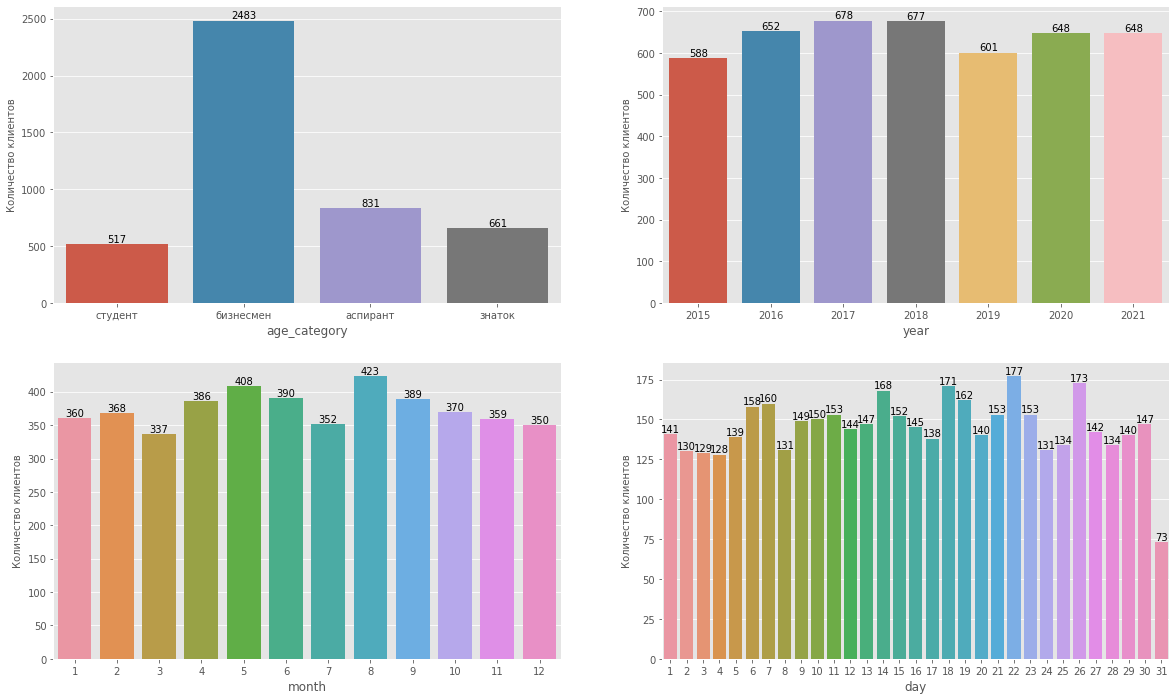

In [82]:
year_filter = 2021 # фильтр по годам  
fig, axes = plt.subplots(len(cat_var), sharey=True, figsize=(20,12))
i=1
for i, col in enumerate(cat_var):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=col, data=df,) #добавить после df для фильтрации [df['year'] == [year_filter]]
    #plt.title("[col]")
    #plt.xlabel(dict_to_rus[col], fontsize = 10)
    plt.ylabel('Количество клиентов', fontsize = 10)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:d}'.format(p.get_height()), 
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

**Вывод:** Половина клиентов телекома - бизнесмены. Количество подключений по годам примерно одинаковое. Был небольшие спады в 2015,2019. По месяцам видим двухпиковую сезонность. К началу лета и к началу осени. По дням распределение количества подключений примерно равномерное (исключение - конец месяца = половина месяцов имеет 31 день). Имеется праздничная/предпразничная сезонность или сезонность выходных/будней, возможна сезонность связанная со списанием компаниями цикличных расходов на услуги 1 числа. и прочее. 

**2)** в разрезе значений признака Возрастная категория (age_category) исследуем распределение интервальных признаков Среднемесячный расход, Средняя продолжительность разговоров, Звонков днем за месяц, Звонков вечером за месяц, Звонков ночью за месяц, Звонки в другие города, Доля звонков на стационарные телефоны, Количество SMS за месяц.


Для этого подсчитаем долю каждой категории в нужном интервальном признаке в динамике по годам

$\blacktriangleright$ Анализ интервальных признаков 
<a class="anchor" id="interval_var"></a>

In [83]:
int_var = ['avr_outcome', 'avr_calls_duration','day_calls_per_month',
       'evening_calls_per_month', 'night_calls_per_month',
       'calls_to_other_cities', 'calls_to_other_countries',
       'perc_of_calls_to_landlines', 'number_of_sms']

In [84]:
data_perc_sum = df.loc[:, df.columns].groupby(['age_category','year'])[int_var].sum()/\
           df.loc[:, df.columns].groupby(['year'])[int_var].sum()*100
data_perc_sum = data_perc_sum.T
data_perc_sum

age_category               аспирант                                      \
year                           2015  2016  2017  2018  2019  2020  2021   
avr_outcome                   21.72 22.16 26.47 24.98 28.30 30.97 24.88   
avr_calls_duration            20.12 21.63 22.77 24.87 27.50 25.64 22.60   
day_calls_per_month           21.32 18.65 24.28 20.82 26.57 29.28 22.04   
evening_calls_per_month       20.50 20.00 23.22 21.83 25.50 24.73 21.85   
night_calls_per_month         37.51 37.11 46.42 45.33 50.42 43.88 36.26   
calls_to_other_cities         20.66 20.10 26.07 21.33 28.32 30.90 21.37   
calls_to_other_countries      18.14 16.09 26.85 20.21 25.55 35.07 24.56   
perc_of_calls_to_landlines    16.36 18.85 18.30 19.04 22.04 26.08 20.53   
number_of_sms                 28.78 31.78 34.00 36.90 40.92 33.78 31.12   

age_category               бизнесмен                                      \
year                            2015  2016  2017  2018  2019  2020  2021   
avr_outcome                    59.78 59.81 55.77 56.70 53.07 49.76 58.62   
avr_calls_duration             58.32 59.45 56.04 54.29 53.49 51.41 57.04   
day_calls_per_month            57.99 62.41 55.36 58.34 53.35 50.89 59.11   
evening_calls_per_month        57.24 59.19 51.19 53.95 53.35 51.16 58.57   
night_calls_per_month          39.66 39.21 30.62 27.44 27.89 33.16 43.55   
calls_to_other_cities          66.84 67.09 62.91 64.11 59.72 53.91 65.76   
calls_to_other_countries       65.04 65.65 57.20 63.41 56.57 44.78 58.77   
perc_of_calls_to_landlines     63.80 62.71 61.17 61.28 60.95 52.74 58.74   
number_of_sms                  44.36 42.01 35.13 34.30 33.12 33.49 44.11   

age_category               знаток                                     студент  \
year                         2015  2016  2017  2018  2019  2020  2021    2015   
avr_outcome                 14.19 14.25 11.08 12.63 11.59 14.65 11.71    4.32   
avr_calls_duration          14.78 12.27 11.65 12.83 10.38 15.19 13.35    6.78   
day_calls_per_month         14.38 13.51 11.70 12.41 12.59 13.96 12.83    6.31   
evening_calls_per_month     12.36 11.01 11.43 11.38  9.83 12.50 10.74    9.90   
night_calls_per_month        5.34  5.75  3.99  4.95  4.51  4.99  4.77   17.49   
calls_to_other_cities       11.19 12.16  9.89 13.20  9.64 13.38 11.44    1.31   
calls_to_other_countries    15.04 16.96 12.45 10.10 11.68 17.91 16.67    1.77   
perc_of_calls_to_landlines  16.55 14.29 14.44 14.77 12.62 17.27 16.20    3.29   
number_of_sms                2.16  1.89  1.81  1.83  1.33  2.29  2.01   24.70   

age_category                                                    
year                        2016  2017  2018  2019  2020  2021  
avr_outcome                 3.79  6.68  5.68  7.03  4.62  4.79  
avr_calls_duration          6.65  9.54  8.01  8.63  7.76  7.01  
day_calls_per_month         5.42  8.65  8.43  7.49  5.87  6.01  
evening_calls_per_month     9.80 14.15 12.84 11.32 11.61  8.84  
night_calls_per_month      17.93 18.97 22.28 17.18 17.96 15.42  
calls_to_other_cities       0.65  1.12  1.36  2.31  1.81  1.43  
calls_to_other_countries    1.30  3.50  6.27  6.20  2.24  0.00  
perc_of_calls_to_landlines  4.15  6.09  4.91  4.39  3.91  4.52  
number_of_sms              24.32 29.07 26.96 24.63 30.44 22.77

In [85]:
data_perc_sum = df.loc[:, df.columns].groupby(['age_category','year','month'])[int_var].sum()/\
           df.loc[:, df.columns].groupby(['year','month'])[int_var].sum()*100
data_perc_sum = data_perc_sum.T
data_perc_sum

year                           2015                                    \
month                            1                                 2    
age_category               аспирант бизнесмен знаток студент аспирант   
avr_outcome                    9.14     70.61  19.69    0.55    15.26   
avr_calls_duration            15.90     68.13  14.23    1.74    14.57   
day_calls_per_month           11.92     62.23  24.10    1.75    14.99   
evening_calls_per_month       16.52     64.05  16.48    2.95    15.53   
night_calls_per_month          3.40     70.39  11.65   14.56    44.84   
calls_to_other_cities         21.20     62.90  15.90    0.00    14.23   
calls_to_other_countries       0.00     83.33  16.67    0.00    15.00   
perc_of_calls_to_landlines    18.30     69.93  11.33    0.44    12.33   
number_of_sms                 22.74     60.31   2.45   14.49    26.36   

year                                                                           \
month                                                     3                     
age_category               бизнесмен знаток студент аспирант бизнесмен знаток   
avr_outcome                    50.30  26.85    7.60    11.47     80.82   4.34   
avr_calls_duration             49.29  24.37   11.77    12.41     71.72  10.94   
day_calls_per_month            49.10  23.49   12.42    10.93     80.25   5.06   
evening_calls_per_month        46.49  20.76   17.22    15.02     74.81   4.40   
night_calls_per_month          25.96  10.32   18.88    22.17     59.13   2.61   
calls_to_other_cities          64.02  19.67    2.09    16.99     79.17   3.85   
calls_to_other_countries       40.00  40.00    5.00    26.67     60.00  13.33   
perc_of_calls_to_landlines     54.33  27.83    5.50    12.53     77.87   8.00   
number_of_sms                  24.05   4.21   45.37    19.30     72.60   1.17   

year                                                                           \
month                                    4                                 5    
age_category               студент аспирант бизнесмен знаток студент аспирант   
avr_outcome                   3.37    29.25     58.82   9.23    2.71    27.57   
avr_calls_duration            4.93    23.42     59.79  12.08    4.70    17.88   
day_calls_per_month           3.76    29.59     51.68  15.39    3.34    21.17   
evening_calls_per_month       5.77    24.03     62.64   7.19    6.13    19.12   
night_calls_per_month        16.09    59.37     28.67   4.29    7.67    23.11   
calls_to_other_cities         0.00    33.67     62.56   3.77    0.00    24.07   
calls_to_other_countries      0.00    33.33     58.33   8.33    0.00     9.09   
perc_of_calls_to_landlines    1.60    17.69     61.36  18.18    2.76    18.27   
number_of_sms                 6.93    38.54     41.77   2.10   17.58    21.55   

year                                                                           \
month                                                     6                     
age_category               бизнесмен знаток студент аспирант бизнесмен знаток   
avr_outcome                    49.59  19.63    3.21    22.85     64.67   8.93   
avr_calls_duration             53.42  22.99    5.71    25.01     55.29  11.55   
day_calls_per_month            51.48  20.18    7.18    26.12     60.30   9.92   
evening_calls_per_month        54.89  17.79    8.19    23.49     58.26   9.40   
night_calls_per_month          52.99   2.79   21.12    57.87     29.60   0.27   
calls_to_other_cities          72.21   2.84    0.88    22.07     68.79   9.15   
calls_to_other_countries       54.55  36.36    0.00    11.43     85.71   0.00   
perc_of_calls_to_landlines     57.06  21.85    2.82    18.65     59.22  16.39   
number_of_sms                  56.19   2.78   19.48    43.38     31.74   1.67   

year                                                                           \
month                                    7                                 8    
age_category               студент аспиран

**Вывод:** 
Категория "Студенты" (возраст от 19 до 24 лет) мало тратятся, мало звонят днем, в другие города, страны и на стац.телефоны. Но активны в смс, вечерних и ночных звонках.

Категория "Аспиранты" (возраст от 25 до 33 лет) имеет самые высокие среднемесячные расходы. Так же у этой группы самые высокие показатели по количеству звонков в дневное, вечернее и ночное время. Звонки в другие города, страны и на стационарные телефоны так же имеют высокие показатели, активно пользуются услугой "смс". Но имеют тенденцию спада в расходах, звонках, продолжительности и смс в бизнесе телеком в целом. 

Категория "Бизнесмены" (возраст от 35 до 56 лет) имеют среднемесячные расходы выше средних отметок, при этом предпочитают совершать звонки в дневное и вечернее время. У этой категории высокие показатели по звонкам в города, страны, на стационарные телефоны при этом имеют малую долю по количеству смс.
Бизнесмены имеют увеличили склонность тратиться - есть тенденция роста в количестве и продолжительности звонков в любое время (и днем и вечером и ночью)


Категория "Знатоки" (возраст от 57 до 70 лет) предпочитают совершать звонки в дневное и вечернее время при этом имеют средний среднемесячный расход. Также редко звонят ночью, пишут смс, имеют средние показатели по звонкам в другие города и страны. Также данная категория имеет высокие показатели по доле звонков на стационарные телефоны. Есть положительная динамика роста в звонках в другие города.



**3)** Для каждого из признаков рассчитаем выборочное среднее, медиану и моду. Построим графики. 

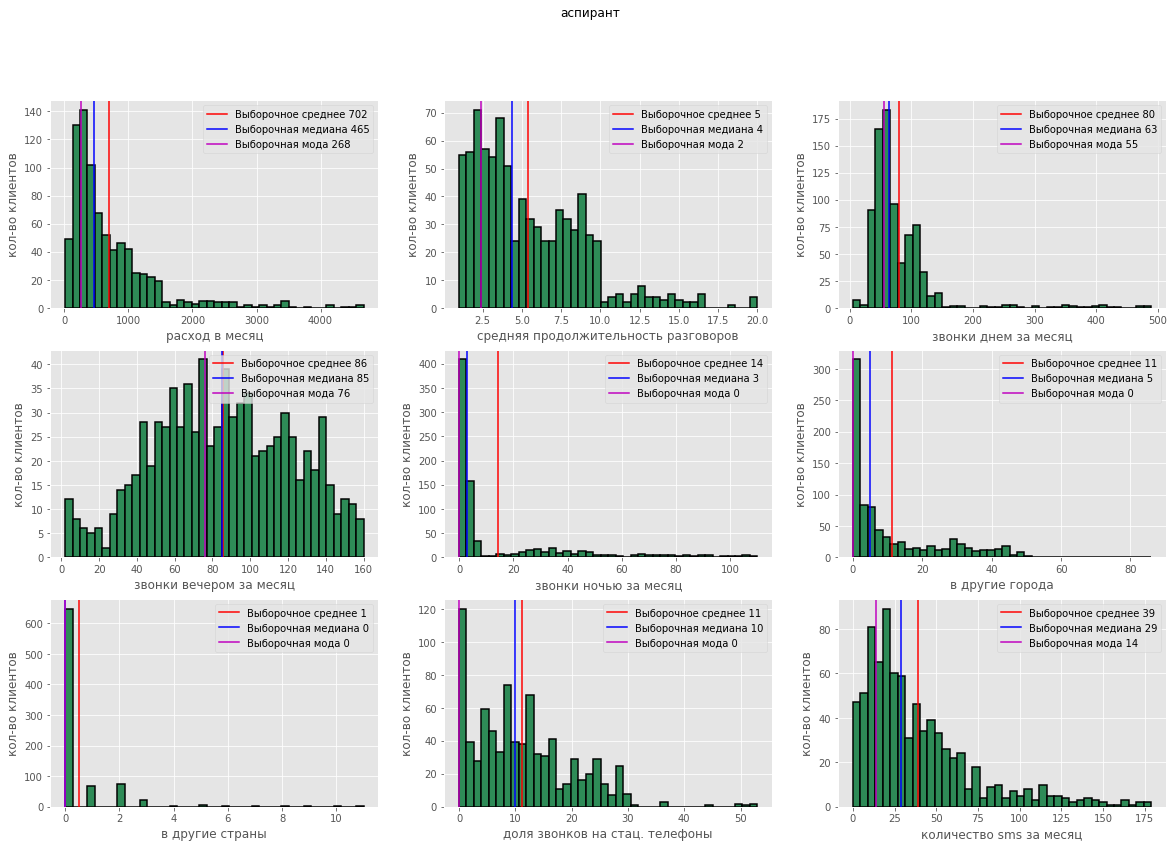

In [86]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(20,13))
i = 0     #     0x  из 3х3  
j = 0     #      x0  из 3х3
l = 0     #    индекс int_var
val = 'аспирант'   #  изменять название признака age_category 
for i in range(3):
    for j in range(3):
        marker = df[df.iloc[:,-1] == val][int_var[l]]
        axes[i, j].hist(marker, bins = 40, color = "seagreen", edgecolor='black', linewidth=1.5)
        axes[i, j].axvline(marker.mean(), color = 'red', label = f'Выборочное среднее {round(marker.mean())}')
        axes[i, j].axvline(marker.median(), color = 'b', label = f'Выборочная медиана {round(marker.median())}')
        axes[i, j].axvline(marker.mode()[0], color = 'm', label = f'Выборочная мода {round(marker.mode()[0])}')
        #axes[i, j].set_legend("<<{}>>".format(dict_to_rus[int_var[l]]))
        axes[i, j].set_xlabel(dict_to_rus[int_var[l]])
        axes[i, j].set_ylabel('кол-во клиентов')
        fig.suptitle(val)
        axes[i, j].set_suptitle_ = 30
        l+=1
        axes[i, j].legend()

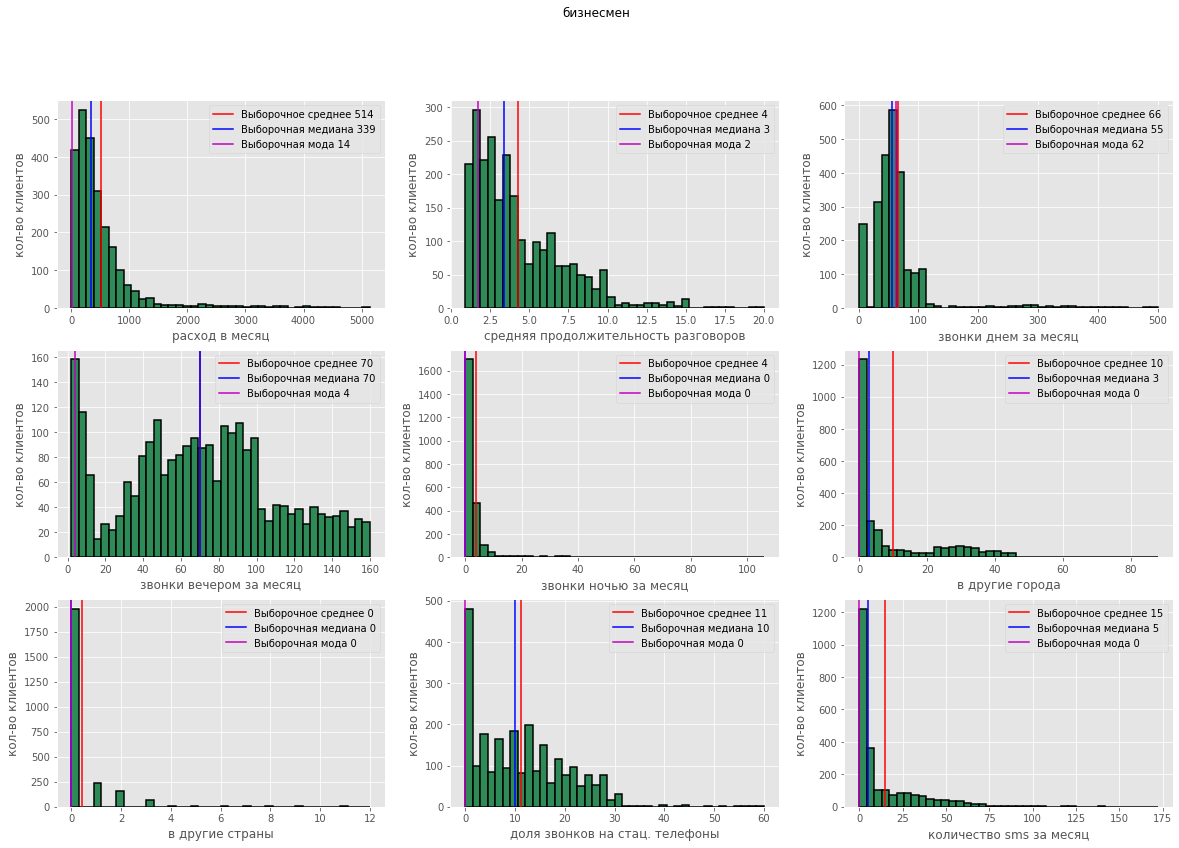

In [87]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(20,13))
i = 0     #     0x  из 3х3  
j = 0     #      x0  из 3х3
l = 0     #    индекс int_var
val = 'бизнесмен'   #  изменять название признака age_category 
for i in range(3):
    for j in range(3):
        marker = df[df.iloc[:,-1] == val][int_var[l]]
        axes[i, j].hist(marker, bins = 40, color = "seagreen", edgecolor='black', linewidth=1.5)
        axes[i, j].axvline(marker.mean(), color = 'red', label = f'Выборочное среднее {round(marker.mean())}')
        axes[i, j].axvline(marker.median(), color = 'b', label = f'Выборочная медиана {round(marker.median())}')
        axes[i, j].axvline(marker.mode()[0], color = 'm', label = f'Выборочная мода {round(marker.mode()[0])}')
        #axes[i, j].set_legend("<<{}>>".format(dict_to_rus[int_var[l]]))
        axes[i, j].set_xlabel(dict_to_rus[int_var[l]])
        axes[i, j].set_ylabel('кол-во клиентов')
        fig.suptitle(val)
        axes[i, j].set_suptitle_ = 30
        l+=1
        axes[i, j].legend()

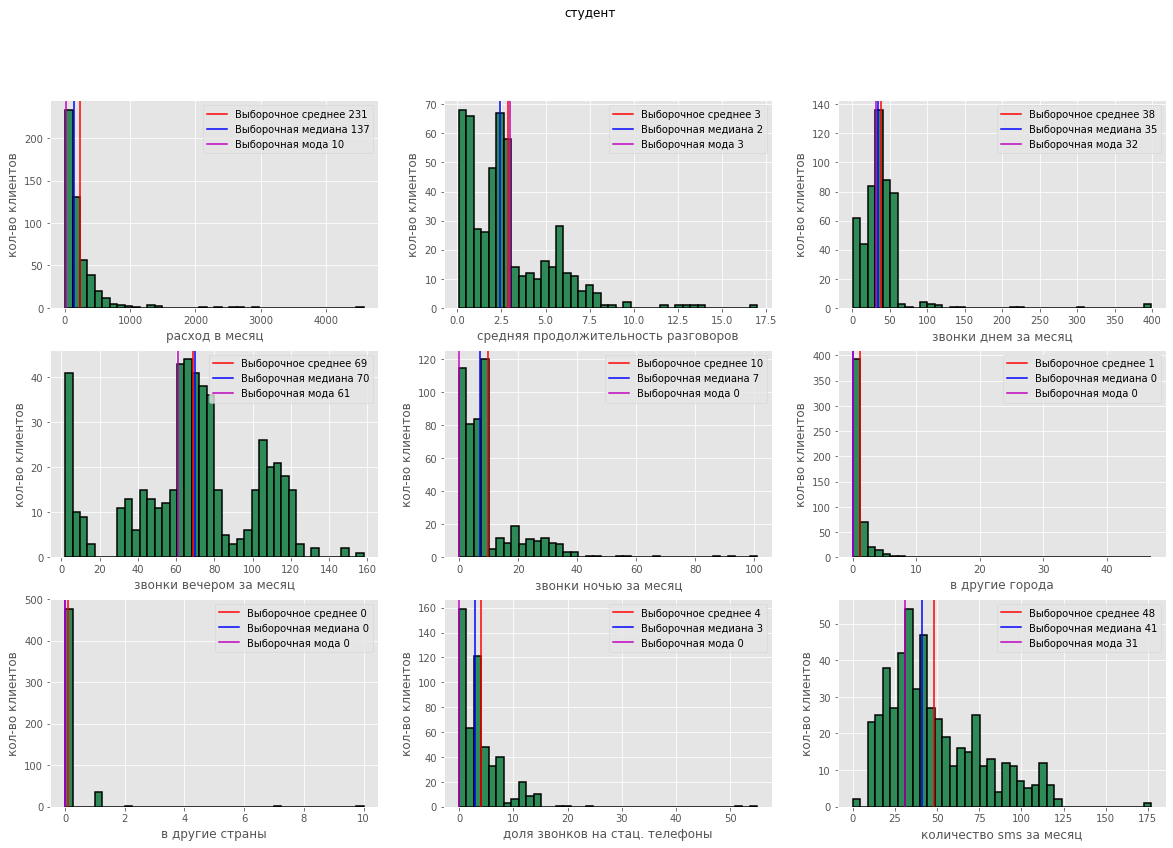

In [88]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(20,13))
i = 0     #     0x  из 3х3  
j = 0     #      x0  из 3х3
l = 0     #    индекс int_var
val = 'студент'   #  изменять название признака age_category 
for i in range(3):
    for j in range(3):
        marker = df[df.iloc[:,-1] == val][int_var[l]]
        axes[i, j].hist(marker, bins = 40, color = "seagreen", edgecolor='black', linewidth=1.5)
        axes[i, j].axvline(marker.mean(), color = 'red', label = f'Выборочное среднее {round(marker.mean())}')
        axes[i, j].axvline(marker.median(), color = 'b', label = f'Выборочная медиана {round(marker.median())}')
        axes[i, j].axvline(marker.mode()[0], color = 'm', label = f'Выборочная мода {round(marker.mode()[0])}')
        #axes[i, j].set_legend("<<{}>>".format(dict_to_rus[int_var[l]]))
        axes[i, j].set_xlabel(dict_to_rus[int_var[l]])
        axes[i, j].set_ylabel('кол-во клиентов')
        fig.suptitle(val)
        axes[i, j].set_suptitle_ = 30
        l+=1
        axes[i, j].legend()

In [89]:
df_mean = df.loc[:, df.columns].groupby(['age_category','year'])[int_var].agg('mean').T
df_mean

age_category               аспирант                                            \
year                           2015   2016   2017   2018   2019   2020   2021   
avr_outcome                  670.99 678.68 736.80 695.43 682.11 773.45 665.78   
avr_calls_duration             5.14   5.56   5.45   5.73   5.56   5.08   5.14   
day_calls_per_month           80.63  71.89  84.21  73.63  82.58  91.93  75.68   
evening_calls_per_month       84.29  87.94  92.26  84.25  85.95  82.98  81.07   
night_calls_per_month         13.70  13.58  16.30  16.52  16.74  11.67  12.46   
calls_to_other_cities         11.46  10.43  11.04  11.34  11.86  12.12   9.95   
calls_to_other_countries       0.40   0.35   0.57   0.47   0.56   0.70   0.48   
perc_of_calls_to_landlines    10.00  11.93  10.02  10.85  11.27  12.89  11.64   
number_of_sms                 36.22  40.88  43.07  43.24  42.12  31.43  35.89   

age_category               бизнесмен                                     \
year                            2015   2016   2017   2018   2019   2020   
avr_outcome                   581.50 511.87 516.16 528.99 474.85 485.11   
avr_calls_duration              4.71   4.27   4.44   4.17   4.09   4.08   
day_calls_per_month            69.06  67.02  63.81  69.72  62.25  63.15   
evening_calls_per_month        74.15  72.15  68.16  69.80  67.10  68.87   
night_calls_per_month           4.56   3.98   3.59   3.35   3.45   3.53   
calls_to_other_cities          11.67   9.65   8.90  11.43   9.33   8.46   
calls_to_other_countries        0.45   0.39   0.40   0.50   0.46   0.36   
perc_of_calls_to_landlines     12.28  11.01  11.19  11.71  11.63  10.43   
number_of_sms                  17.58  14.98  14.88  13.47  12.72  12.46   

age_category                      знаток                                     \
year                         2021   2015   2016   2017   2018   2019   2020   
avr_outcome                501.43 475.72 530.63 380.72 428.18 474.66 457.33   
avr_calls_duration           4.14   4.14   3.83   3.48   3.57   3.59   3.88   
day_calls_per_month         64.15  59.59  63.32  50.09  53.47  67.00  55.62   
evening_calls_per_month     69.08  55.68  58.21  57.13  53.50  56.75  53.53   
night_calls_per_month        4.76   2.14   2.53   1.74   2.20   2.56   1.70   
calls_to_other_cities        9.73   6.80   7.58   5.21   8.54   6.92   6.70   
calls_to_other_countries     0.36   0.36   0.44   0.33   0.29   0.44   0.46   
perc_of_calls_to_landlines  10.59  11.09  10.88   9.84  10.26  11.05  10.90   
number_of_sms               16.17   2.98   2.92   2.85   2.61   2.34   2.71   

age_category                      студент                                     \
year                         2021    2015   2016   2017   2018   2019   2020   
avr_outcome                362.99  212.57 177.29 247.42 226.14 308.99 202.48   
avr_calls_duration           3.56    2.79   2.61   2.97   2.62   3.20   2.79   
day_calls_per_month         51.11   38.38  32.39  39.04  42.64  42.78  33.78   
evening_calls_per_month     46.14   65.53  65.90  73.76  70.90  70.18  70.53   
night_calls_per_month        1.90   10.28  10.03   8.74  11.62  10.49   8.65   
calls_to_other_cities        6.17    1.17   0.51   0.62   1.03   1.78   1.28   
calls_to_other_countries     0.38    0.06   0.04   0.10   0.21   0.25   0.08   
perc_of_calls_to_landlines  10.64    3.23   4.01   4.38   4.00   4.13   3.50   
number_of_sms                2.68   50.02  47.83  48.30  45.20  46.60  51.28   

age_category                       
year                         2021  
avr_outcome                242.05  
avr_calls_duration           3.01  
day_calls_per_month         38.61  
evening_calls_per_month     61.90  
night_calls_per_month       10.00  
calls_to_other_cities        1.26  
calls_to_other_countries     0.00  
perc_of_calls_to_landlines   4.84  
number_of_sms               49.56

In [90]:
#% по всему столбцу это для меня
df3 = df.groupby(['age_category','year']).agg({int_var[1] : 'sum'}).assign(pct_total=lambda x: x / x.sum()*100)
df3.head(2)

avr_calls_duration  pct_total
age_category year                               
аспирант     2015              529.50       2.80
             2016              594.60       3.14

In [91]:
df_median = df.loc[:, df.columns].groupby('age_category')[int_var].agg('median').T
df_median

age_category,аспирант,бизнесмен,знаток,студент
avr_outcome,464.76,339.20,222.95,136.76
avr_calls_duration,4.40,3.40,2.80,2.40
day_calls_per_month,63.00,55.00,44.00,35.00
evening_calls_per_month,85.00,70.00,51.00,70.00
night_calls_per_month,3.00,0.00,0.00,7.00
calls_to_other_cities,5.00,3.00,0.00,0.00
calls_to_other_countries,0.00,0.00,0.00,0.00
perc_of_calls_to_landlines,10.00,10.00,8.00,3.00
number_of_sms,29.00,5.00,3.00,41.00


df.columns

In [92]:
col = 'year'
data_all = df[col].value_counts()
r = (pd.DataFrame([df[df.age_category == 'бизнесмен'][col].value_counts()/data_all, 
                      df[df.age_category == 'знаток'][col].value_counts()/data_all,
                      df[df.age_category == 'студент'][col].value_counts()/data_all, 
                      df[df.age_category == 'аспирант'][col].value_counts()/data_all])).T
r.columns = ['0','1','2','3']
r.index


Int64Index([2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='int64')

In [93]:
df.columns

Index(['age', 'avr_outcome', 'avr_calls_duration', 'day_calls_per_month',
       'evening_calls_per_month', 'night_calls_per_month',
       'calls_to_other_cities', 'calls_to_other_countries',
       'perc_of_calls_to_landlines', 'number_of_sms', 'tariff_activ_date',
       'year', 'month', 'day', 'age_category'],
      dtype='object')

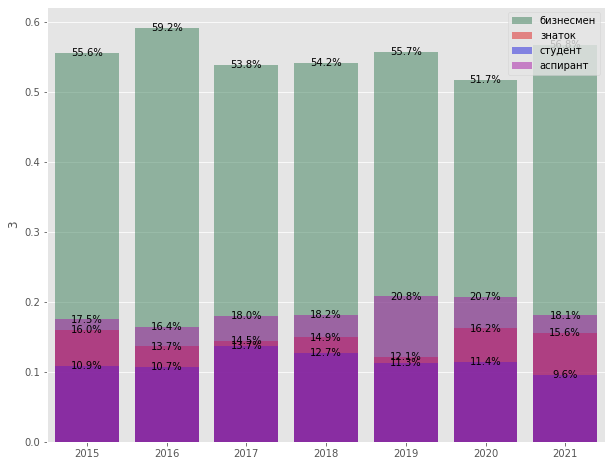

In [94]:
# рабочий скрипт не удалять
new_var = ['year']
fig, axes = plt.subplots(2, figsize=(10,8))
i=0
for i, col in enumerate(new_var):
    plt.subplot(1,1,i+1)
    data_all = df[col].value_counts()
    r = (pd.DataFrame([df[df.age_category == 'бизнесмен'][col].value_counts()/data_all, 
                      df[df.age_category == 'знаток'][col].value_counts()/data_all,
                      df[df.age_category == 'студент'][col].value_counts()/data_all, 
                      df[df.age_category == 'аспирант'][col].value_counts()/data_all]).T)
    r.columns = ['0','1','2','3']
    ax1 = sns.barplot(x = r.index, y = r['0'], data = r, color='seagreen',
                      alpha = 0.5, label = 'бизнесмен')
    ax2 = sns.barplot(x = r.index, y = r['1'], data = r, color='red', 
                      alpha = 0.5, label = 'знаток')
    ax3 = sns.barplot(x = r.index, y = r['2'], data = r, color='b',
                      alpha = 0.5, label = 'студент')
    ax4 = sns.barplot(x = r.index, y = r['3'], data = r, color='m',
                      alpha = 0.5, label = 'аспирант')   

    for p in ax1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax1.annotate('{:.1f}%'.format(100*y), 
            (x.mean(), y),ha='center', va='center', fontsize = 10)
    
    
    plt.legend()
    

In [95]:
df.columns

Index(['age', 'avr_outcome', 'avr_calls_duration', 'day_calls_per_month',
       'evening_calls_per_month', 'night_calls_per_month',
       'calls_to_other_cities', 'calls_to_other_countries',
       'perc_of_calls_to_landlines', 'number_of_sms', 'tariff_activ_date',
       'year', 'month', 'day', 'age_category'],
      dtype='object')

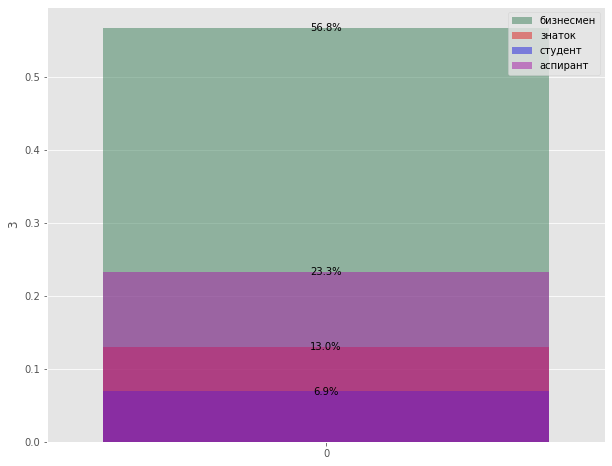

In [96]:
#рабочий скрипт доли по суммам количественного(интервального) показателя в разрезе категорий возраста (age_category) не удалять
new_var = ['day_calls_per_month']
fig, axes = plt.subplots(2, figsize=(10,8))
i=0
for i, col in enumerate(new_var):
    plt.subplot(1,1,i+1)
    data_all = df[col].sum()
    r = (pd.DataFrame([df[df.age_category == 'бизнесмен'][col].sum()/data_all, 
                      df[df.age_category == 'знаток'][col].sum()/data_all,
                      df[df.age_category == 'студент'][col].sum()/data_all, 
                      df[df.age_category == 'аспирант'][col].sum()/data_all]).T)
    r.columns = ['0','1','2','3']
    ax1 = sns.barplot(x = r.index, y = r['0'], data = r, color='seagreen',
                      alpha = 0.5, label = 'бизнесмен')
    ax2 = sns.barplot(x = r.index, y = r['1'], data = r, color='red', 
                      alpha = 0.5, label = 'знаток')
    ax3 = sns.barplot(x = r.index, y = r['2'], data = r, color='b',
                      alpha = 0.5, label = 'студент')
    ax4 = sns.barplot(x = r.index, y = r['3'], data = r, color='m',
                      alpha = 0.5, label = 'аспирант')   

    for p in ax1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax1.annotate('{:.1f}%'.format(100*y), 
            (x.mean(), y),ha='center', va='center', fontsize = 10)
    
    plt.legend(loc='best')
    

In [97]:
# далее идет попытка сделать предыдущий график (скрипт) по годам

In [98]:
    g = (pd.DataFrame([df[df.age_category == 'бизнесмен'][col].sum()/data_all, 
                      df[df.age_category == 'знаток'][col].sum()/data_all,
                      df[df.age_category == 'студент'][col].sum()/data_all, 
                      df[df.age_category == 'аспирант'][col].sum()/data_all]).T)
    g

,0,1,2,3
0,0.57,0.13,0.07,0.23


In [99]:
    god = 2015
    #df[df['year'] == god]
    data_age =  df[df['year'] == god][col].sum()
    r = (pd.DataFrame([df[(df['age_category'] == 'бизнесмен') & (df['year'] == god)][col].sum()/data_age, 
                      df[(df['age_category'] == 'знаток') & (df['year'] == god)][col].sum()/data_age,
                      df[(df['age_category'] == 'студент') & (df['year'] == god)][col].sum()/data_age, 
                      df[(df['age_category'] == 'аспирант') & (df['year'] == god)][col].sum()/data_age]).T)
    r

,0,1,2,3
0,0.58,0.14,0.06,0.21


In [100]:
df_new = df[(df['age_category'] == 'бизнесмен') & (df['year'] >= 2015)]

**Итак:** аномалий (опечаток, странных пиков, слишком высоких процентов в сравнении с другими годами) на первый взгляд не выявлено. Или я не умею пока это делать. Попробуем наглядно построить боксплоты(коробки) и дополнительно воспользоваться расчетной формулой пиков. Прикинуть объем аномалий. 

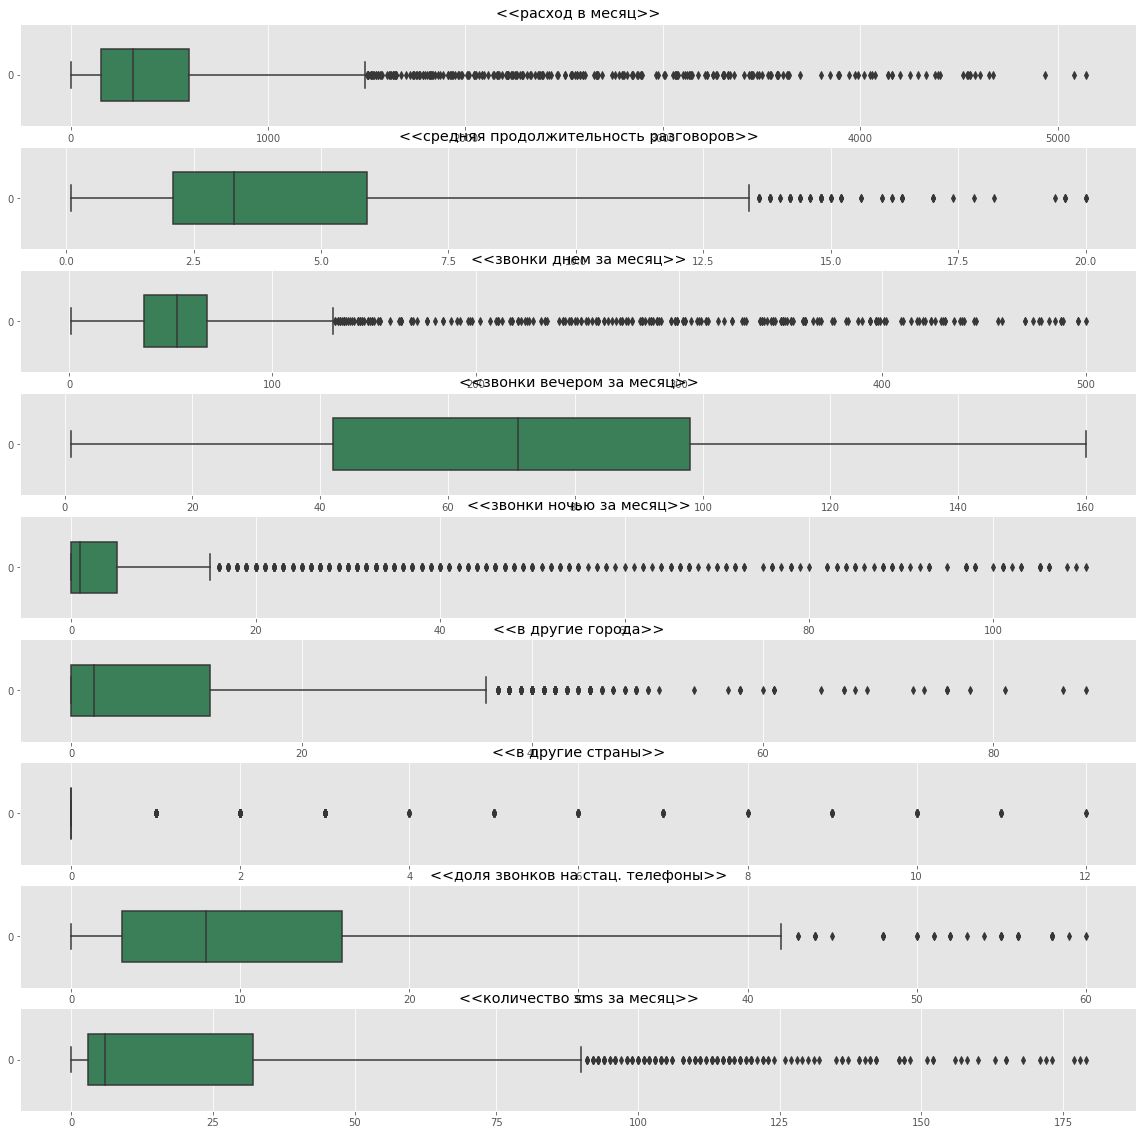

In [123]:
from os import minor
fig, axes = plt.subplots(11, 1, sharey=True, figsize=(20,20), squeeze =False)
for i, col in enumerate(int_var):
    plt.subplot(9,1,i+1)
    sns.boxplot(data=df[col], whis = 2, color = "seagreen", orient="h", width = 0.5)
    plt.title("<<{}>>".format(dict_to_rus[col]))

# не знаю как уменьшить длину рамки коробки чтобы заголовок не сливался с осью

In [102]:
#поиск аномалий
# функция для расчета границ усов 
# непрерывных числовых признаков
def calc_boxplot(col):
  Q1, median, Q3 = np.percentile(np.asarray(df[col].dropna()), [25, 50, 75])
  IQR = Q3 - Q1
  loval = Q1 - 1.5 * IQR
  hival = Q3 + 1.5 * IQR
  wiskhi = np.compress(np.asarray(df[col]) <= hival, np.asarray(df[col]))
  wisklo = np.compress(np.asarray(df[col]) >= loval, np.asarray(df[col]))
  actual_hival = np.max(wiskhi)
  actual_loval = np.min(wisklo)
  return actual_loval, actual_hival #(нижний ус, верхний ус)
print('Расчетные границы "аномалий" для боксплота:')
print('Для показателя:age',calc_boxplot('age'))
print('Для показателя:avr_outcome',calc_boxplot('avr_outcome'))
print('Для показателя:avr_calls_duration',calc_boxplot('avr_calls_duration'))
print('Для показателя:day_calls_per_month',calc_boxplot('day_calls_per_month'))
print('Для показателя:evening_calls_per_month',calc_boxplot('evening_calls_per_month'))
print('Для показателя:night_calls_per_month',calc_boxplot('night_calls_per_month'))
print('Для показателя:calls_to_other_cities',calc_boxplot('calls_to_other_cities'))
print('Для показателя:calls_to_other_countries',calc_boxplot('calls_to_other_countries'))
print('Для показателя:perc_of_calls_to_landlines',calc_boxplot('perc_of_calls_to_landlines'))
print('Для показателя:number_of_sms',calc_boxplot('number_of_sms'))



Расчетные границы "аномалий" для боксплота:
Для показателя:age (19, 70)
Для показателя:avr_outcome (3.18, 1270.16)
Для показателя:avr_calls_duration (0.1, 11.6)
Для показателя:day_calls_per_month (1.0, 114.0)
Для показателя:evening_calls_per_month (1.0, 160.0)
Для показателя:night_calls_per_month (0, 12)
Для показателя:calls_to_other_cities (0, 30)
Для показателя:calls_to_other_countries (0, 0)
Для показателя:perc_of_calls_to_landlines (0, 35)
Для показателя:number_of_sms (0, 75)


**Вывод:** 
По результатам построенных графиков и расчета, мы можем сделать следующие выводы.Выбросами будем считать записи, для одновременно выполняются следующие ограничения:
- признак  - 70⩾возраст⩾19 ;
- признак  - среднемесячный расход ⩾ 1270 ;
- признак  - средняя продолжительность разговоров ⩾12 ;
- признак  - звонков днем за месяц ⩾ 114;
- признак  - звонков вечером за месяц ⩾ 160;
- признак  - звонков ночью за месяц ⩾ 12;
- признак  - звонки в другие города ⩾ 30;
- признак  - доля звонков на стационарные телефоны ⩾ 35;
- признак  - количество sms за месяц ⩾ 75.


Гистограммы нам показывают, что признаки, находящиеся за данными значениями, не играют существенные роли и могут являться аномалиями, поэтому принимаем решение их отбросить. Также по графикам мы видим, что звонки в вечернее время равномерны рапределены. Их мы не будем отбрасывать.

In [103]:
df.columns

Index(['age', 'avr_outcome', 'avr_calls_duration', 'day_calls_per_month',
       'evening_calls_per_month', 'night_calls_per_month',
       'calls_to_other_cities', 'calls_to_other_countries',
       'perc_of_calls_to_landlines', 'number_of_sms', 'tariff_activ_date',
       'year', 'month', 'day', 'age_category'],
      dtype='object')

$\blacktriangleright$ Сформируем датафрейм, не содержащий аномальных записей и оценим потери в данных

In [104]:
df_new = df[(df['age'] <= 70) & (df['age'] >= 19) & 
                 (df['avr_outcome'] <= 1270) &
                 (df['avr_calls_duration'] <= 12) &
                 (df['day_calls_per_month'] <= 114) & 
                 (df['evening_calls_per_month'] <= 160) & 
                 (df['night_calls_per_month'] <= 12) &
                 (df['calls_to_other_cities'] <= 30) &
                 (df['perc_of_calls_to_landlines'] <= 35) & 
                 (df['number_of_sms'] <= 75)                             
                 ]
                 
df_new.head(2)

,age,avr_outcome,avr_calls_duration,day_calls_per_month,evening_calls_per_month,night_calls_per_month,calls_to_other_cities,calls_to_other_countries,perc_of_calls_to_landlines,number_of_sms,tariff_activ_date,year,month,day,age_category
0,24,13.92,2.40,12.00,65.00,5,0,0,5,56,2018-06-17 12:14:35,2018,6,17,студент
2,41,113.70,2.10,41.00,27.00,0,0,0,1,36,2015-03-26 11:26:15,2015,3,26,бизнесмен


In [105]:
sh_old = df.shape[0]
sh_new = df_new.shape[0]
print('Количество аномальных наблюдений {:d}, что составляет {:.2%} от общего числа записей.'
      .format(sh_old-sh_new, (sh_old-sh_new)/sh_old))

Количество аномальных наблюдений 1113, что составляет 24.78% от общего числа записей.


**Промежуточный вывод:** На данном этапе провели исследование признаков на аномальные значения. Установлено, что записей с расчетными аномальными значениями признаков немногим больше 24,8% от объема исходной выборки. Удалять не целесообразно. В итоге сформированы два датафрейма, содержащие:
- записи без аномальных значений признаков (df_new);
- записи с аномальными значениями признаков.

В дальнейшем оба датафрейма будут подвергнуты анализу.

**5.** с помощью диаграмм рассеивания исследуейте зависимости между признаками Среднемесячный расход, Средняя продолжительность разговоров, Звонков днем за месяц, Звонков вечером за месяц, Звонков ночью за месяц, Звонки в другие города, Доля звонков на стационарные телефоны, Количество SMS за месяц. Какие выводы можно сделать?

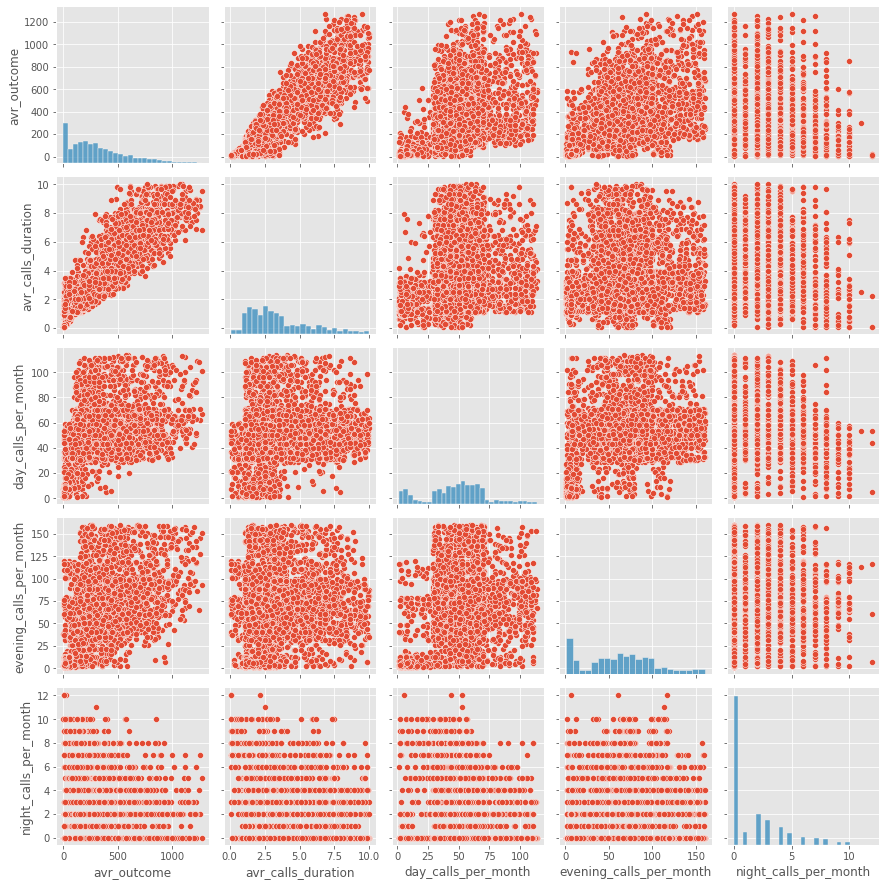

In [106]:
sns.pairplot(df_new[['avr_outcome', 'avr_calls_duration', 'day_calls_per_month',
       'evening_calls_per_month', 'night_calls_per_month']])

**Промежуточный вывод:** Всё что возможно разглядеть, так то что, есть прямая линейная зависимость между расходами и продолжительностью телефонных звонков.


Вывод :

Категория "Студенты" (возраст от 19 до 24 лет) имеет наименьшие среднемесячные расходы при этом у них наблюдается наименьшее количество дневных звонков, но возрастает количество звонков в вечернее и ночное время. Звонки в другие города, страны и на стационарные телефоны минимальны, но наблюдается предпочтение к услуге "смс".

Категория "Аспиранты" (возраст от 25 до 33 лет) имеет самые высокие среднемесячные расходы. Так же у этой группы самые высокие показатели по количеству звонков в дневное, вечернее и ночное время. Звонки в другие города, страны и на стационарные телефоны так же имеют высокие показатели, активно пользуются услугой "смс".

Категория "Бизнесмены" (возраст от 35 до 56 лет) имеют среднемесячные расходы выше средних отметок, при этом предпочитают совершать звонки в дневное и вечернее время. У этой категории высокие показатели по звонкам в города, страны, на стационарные телефоны при этом имеют малую долю по количеству смс.

Категория "Знатоки" (возраст от 57 до 70 лет) предпочитают совершать звонки в дневное и вечернее время при этом имеют средний среднемесячный расход. В категории наблюдаются средние показатели по звонкам в другие города и страны. Данная категория имеет высокие показатели по доле звонков на стационарные телефоны при этом минимально используют функцию "смс.